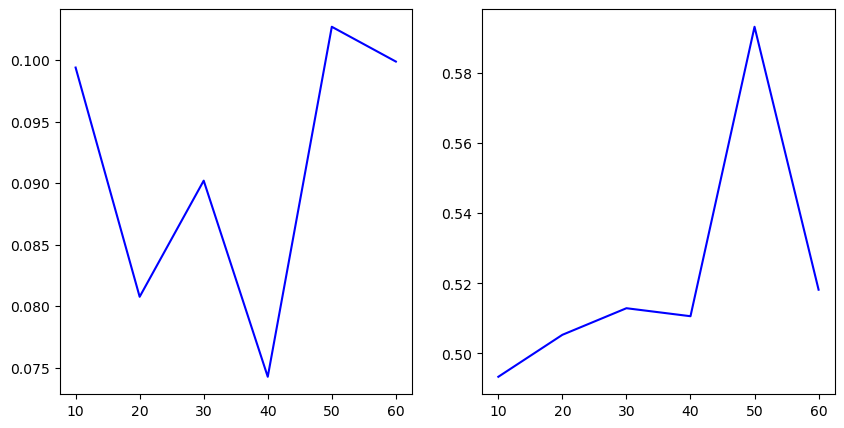

In [1]:

from Scripts import span_f1


import matplotlib.pyplot as plt
def learning_curve(golds, preds):
	scores = []
	for gold, pred in zip(golds, preds):
		scores.append(span_f1.getInstanceScores(gold, pred))
	return scores


size = [10, 20, 30, 40, 50, 60]
golds_norm = ['Data/ai/changed_dev.txt','Data/ai/changed_dev.txt','Data/ai/changed_dev.txt','Data/ai/changed_dev.txt', 'Data/ai/changed_dev.txt', 'Data/ai/changed_dev.txt']
preds_norm = ['Predictions/random_ai_10_predictions.txt','Predictions/random_ai_20_predictions.txt','Predictions/random_ai_30_predictions.txt', 'Predictions/random_ai_40_predictions.txt', 'Predictions/random_ai_50_predictions.txt', 'Predictions/random_ai_60_predictions.txt']

golds= ['Data/ai/dev.txt','Data/ai/dev.txt','Data/ai/dev.txt','Data/ai/dev.txt', 'Data/ai/dev.txt', 'Data/ai/dev.txt']
preds = ['Predictions/random_notnormed_ai_10_predictions.txt','Predictions/random_notnormed_ai_20_predictions.txt','Predictions/random_notnormed_ai_30_predictions.txt', 'Predictions/random_notnormed_ai_40_predictions.txt', 'Predictions/random_data_ai_conllonly_50_predictions.txt', 'Predictions/random_notnormed_ai_60_predictions.txt']
scores_norm = learning_curve(golds_norm, preds_norm)
scores = learning_curve(golds, preds)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(size, scores, color="blue",  label="Learning curve of baseline model")
ax2.plot(size, scores_norm, color="blue",  label="Learning curve of baseline model")

In [7]:
print(scores)

[0.09939220593493028, 0.08075370121130551, 0.09019607843137253, 0.07424960505529227, 0.10270700636942674, 0.09987819732034105]


In [11]:
import codecs

def read_data(file_name):
    """
    read in conll file
    
    :param file_name: path to read from
    :returns: list with sequences of words and labels for each sentence
    """
    data = []
    current_words = []
    current_tags = []

    for line in codecs.open(file_name, encoding='utf-8'):
        line = line.strip()

        if line:
            tok = line.split('\t')
            word = tok[0]
            tag = tok[1]

            current_words.append(word)
            current_tags.append(tag)

        else:
            if current_words:  # skip empty lines
                data.append((current_words, current_tags))
            current_words = []
            current_tags = []

    # check for last one
    if current_tags != []:
        data.append((current_words, current_tags))
    return data


def unite_lists(data):
    result = []
    for l in data:
        result += l
    return result



In [31]:
ai = read_data("Data/ai/changed_dev.txt")
pred_10 = read_data("Predictions/random_ai_10_predictions.txt")
pred_20 = read_data("Predictions/random_ai_20_predictions.txt")
pred_30 = read_data("Predictions/random_ai_30_predictions.txt")
pred_40 = read_data("Predictions/random_ai_40_predictions.txt")
pred_50 = read_data("Predictions/random_ai_50_predictions.txt")
pred_60 = read_data("Predictions/random_ai_60_predictions.txt")

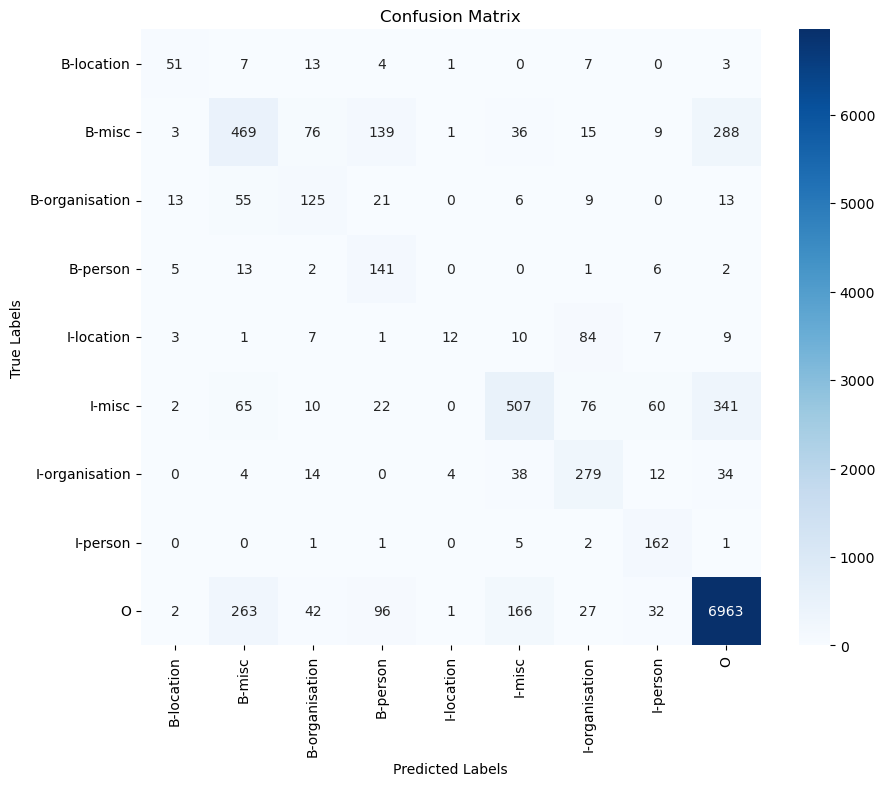

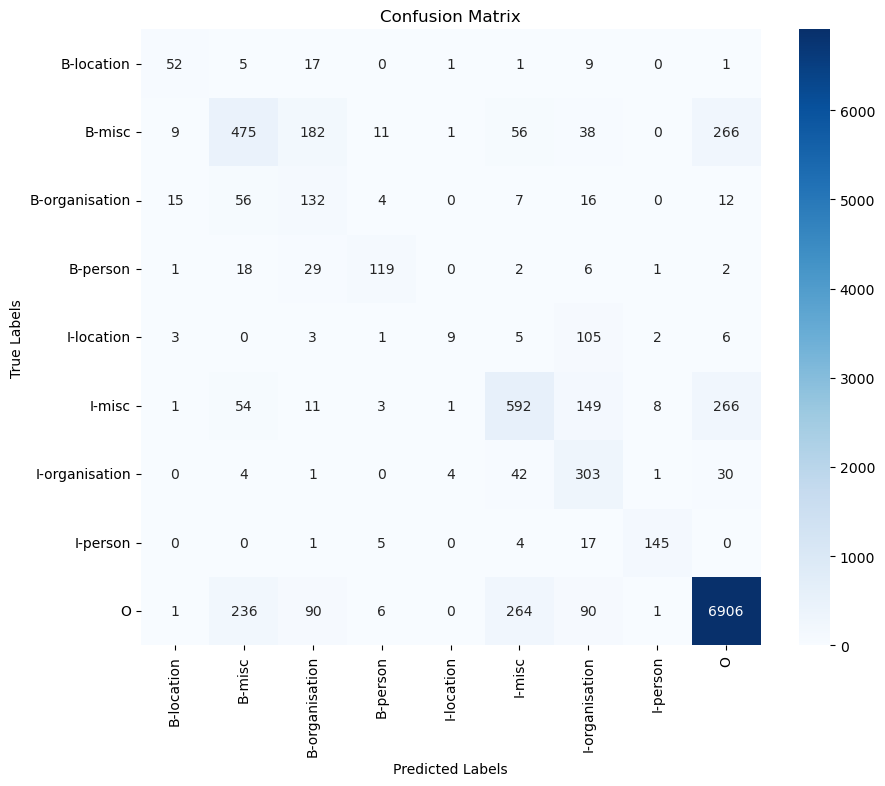

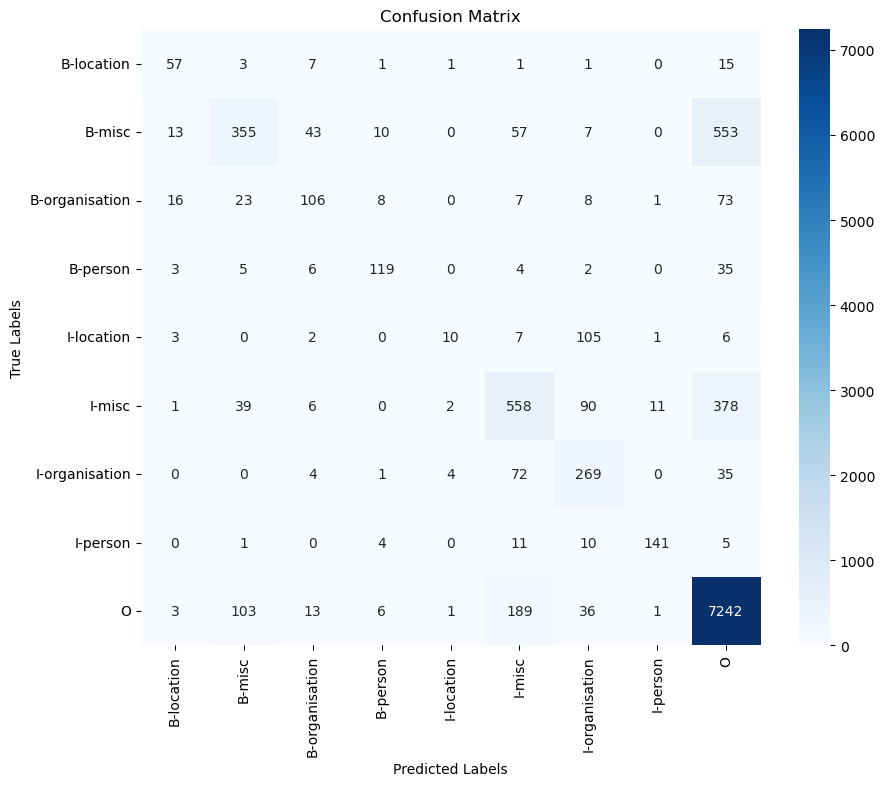

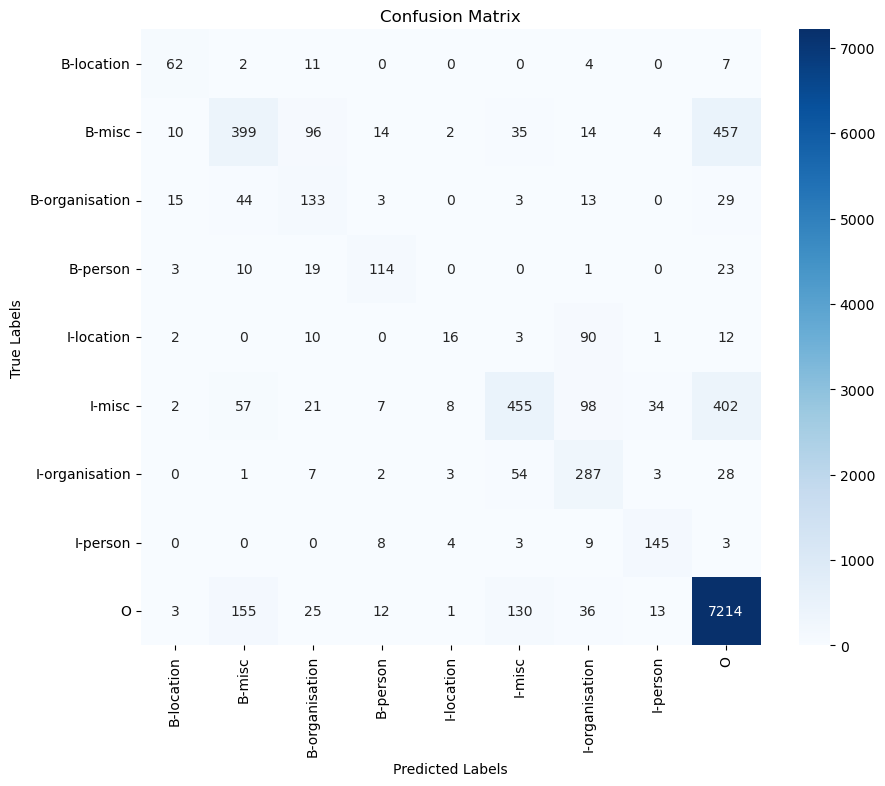

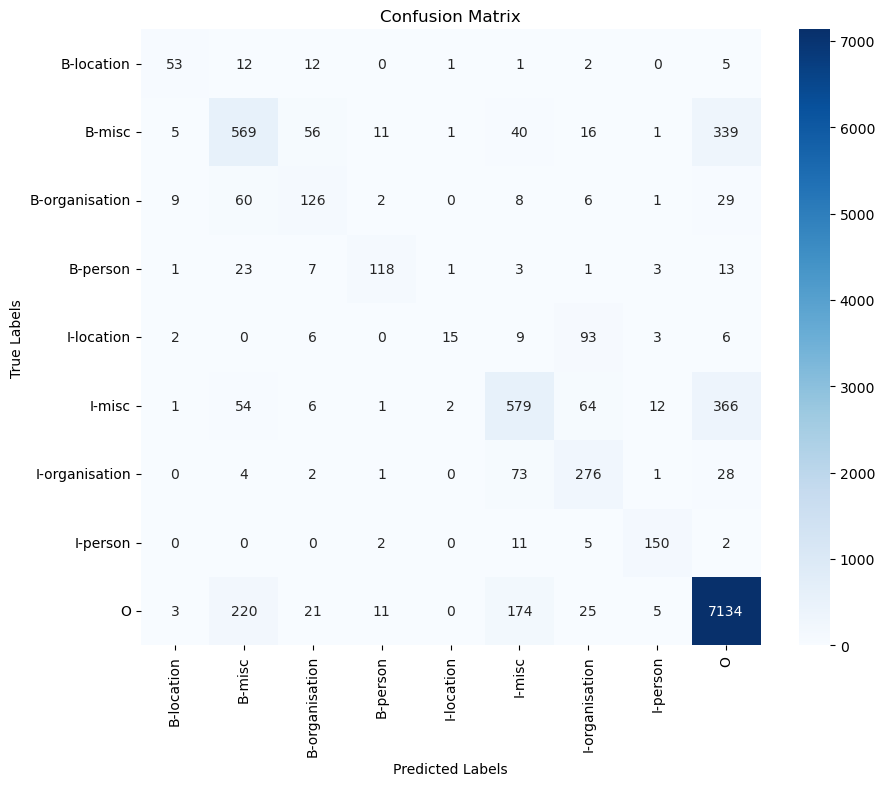

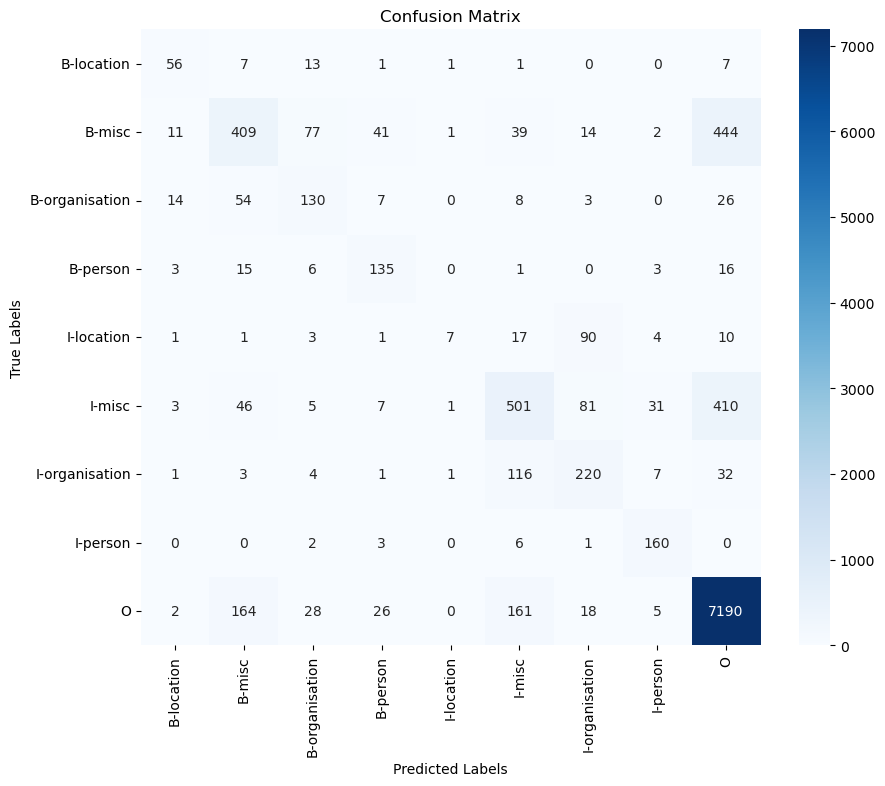

In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

ground_truth= unite_lists(pd.DataFrame(ai)[1])
predicted = [unite_lists(pd.DataFrame(pred_10)[1]),unite_lists(pd.DataFrame(pred_20)[1]),unite_lists(pd.DataFrame(pred_30)[1]),unite_lists(pd.DataFrame(pred_40)[1]),unite_lists(pd.DataFrame(pred_50)[1]),unite_lists(pd.DataFrame(pred_60)[1])]

for pred in predicted:
    cm = confusion_matrix(ground_truth, pred)

    unique_labels = np.unique(ground_truth)
    cm = confusion_matrix(ground_truth, pred, labels=unique_labels)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [33]:
# import matplotlib.pyplot as plt
# import itertools

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, cm[i, j],
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

accuracy:   0.807
Confusion matrix, without normalization


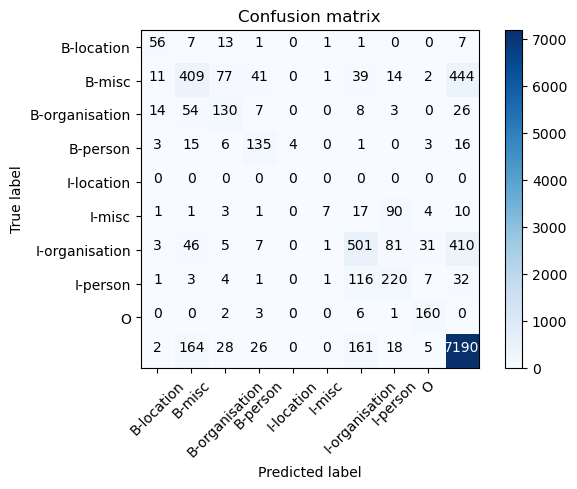

In [42]:
from sklearn import metrics
import itertools

score = metrics.accuracy_score(ground_truth, predicted[5])
print("accuracy:   %0.3f" % score)

# classes=['True', 'False']
classes =np.unique(ground_truth)
cm = metrics.confusion_matrix(ground_truth, predicted[5])
plot_confusion_matrix(cm, classes=classes)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

print('Micro Precision: {:.2f}'.format(precision_score(ground_truth, predicted[5], average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(ground_truth, predicted[5], average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(ground_truth, predicted[5], average='micro')))

Micro Precision: 0.81
Micro Recall: 0.81
Micro F1-score: 0.81



In [36]:
print('\nClassification Report\n')
print(classification_report(ground_truth, predicted[5]))


Classification Report

                precision    recall  f1-score   support

    B-location       0.62      0.65      0.63        86
        B-misc       0.59      0.39      0.47      1038
B-organisation       0.49      0.54      0.51       242
      B-person       0.61      0.74      0.67       183
      B.person       0.00      0.00      0.00         0
    I-location       0.64      0.05      0.10       134
        I-misc       0.59      0.46      0.52      1085
I-organisation       0.52      0.57      0.54       385
      I-person       0.75      0.93      0.83       172
             O       0.88      0.95      0.91      7594

      accuracy                           0.81     10919
     macro avg       0.57      0.53      0.52     10919
  weighted avg       0.79      0.81      0.79     10919



/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
